# 1. Import and install dependencies

In [1]:
# !pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import mediapipe as mp

# 2. Key points using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [45]:
# Applies landmarks to the current frame (Overrides the current frame)
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [4]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
    #                          mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
    #                          mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
    #                          ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 
    

In [7]:
# Holistic model
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.8, min_tracking_confidence=0.9) as holistic:
    while cap.isOpened():
        for frame_num in range(30):
            ret, frame = cap.read()
            if not ret:
                print("Ignoring empty camera frame.")
                continue
            
            # Make detections
            image, results = mediapipe_detection(frame, holistic)
            
            # Draw landmarks
            # draw_landmarks(image, results) # Default styling
            draw_styled_landmarks(image, results) # Custom styling
            
            cv2.putText(
                    image,
                    "Recording {}".format(frame_num),
                    (20, 400),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    1,
                    (0, 255, 0),
                    2,
                    cv2.LINE_AA,
                )

            cv2.imshow('MediaPipe Hands', image)
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

    cap.release()
    cv2.destroyAllWindows()

# while cap.isOpened():
#     for frame_num in range(30):
#         ret, frame = cap.read()
#         if not ret:
#             print("Ignoring empty camera frame.")
#             continue
        
#         cv2.putText(
#                 frame,
#                 "Recording {}".format(frame_num),
#                 (20, 400),
#                 cv2.FONT_HERSHEY_SIMPLEX,
#                 1,
#                 (0, 255, 0),
#                 2,
#                 cv2.LINE_AA,
#             )

#         cv2.imshow('MediaPipe Hands', frame)
        
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             break

# cap.release()
# cv2.destroyAllWindows()

KeyboardInterrupt: 

In [8]:
cap.release()
cv2.destroyAllWindows()

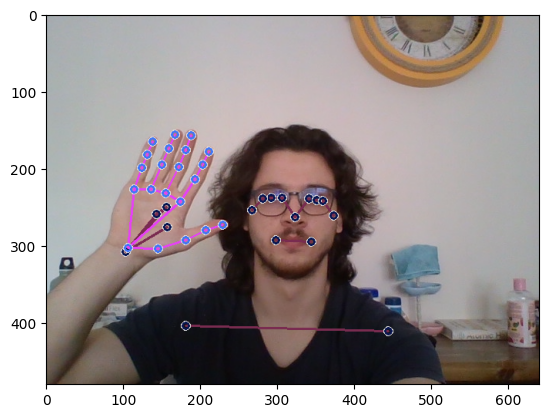

In [8]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# 3. Extract Key point Values

In [5]:
"""
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)
""" 
# The for loop above is the same code as the code below
# If our landmarks are not in frame, we replace them with zeros
# We flatten the array to make it a 1D array rather than a 2D array
"""
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
"""
# The for loop above is the same code as the code below
# We concatenate the arrays to make one array 

# Extract Keypoints Holistic
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    # face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, lh, rh])


# 4. Setup Folders for Collection

 We Will have 4 actions, 30 videos per action, 30 frames per video, and each frame will contain 1662 landmarks (pose, face, left hand and right hand)

In [6]:
# Get current path
cwd = os.getcwd()

# Path for exported data, numpy arrays
DATA_PATH = os.path.join(cwd, 'MP_Data') 
# COLLECTING VIDEO DATA
TRAINING_PATH = os.path.join(cwd, 'train')

# Check if folder path exists
if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)
    
# COLLECTING VIDEO DATA
if not os.path.exists(TRAINING_PATH):
    os.makedirs(TRAINING_PATH)

# Actions that we try to detect
# ['none', 'hello', 'thanks', 'iloveyou', 'bullshit']
actions = np.array(['none', 'hello', 'thanks'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 0

In [7]:
# Create a folder for each action
for action in actions: 
    # Path for exported data, numpy arrays
    ACTION_PATH = os.path.join(DATA_PATH, action) 
    
    # COLLECTING VIDEO DATA   
    ACTION_TRAINING_PATH = os.path.join(TRAINING_PATH, action)    
    
    # Check if folder path exists
    if not os.path.exists(ACTION_PATH):
        os.makedirs(ACTION_PATH)
        
    # COLLECTING VIDEO DATA
    if not os.path.exists(ACTION_TRAINING_PATH):
        os.makedirs(ACTION_TRAINING_PATH)
        
    # print(ACTION_PATH)
    print(ACTION_TRAINING_PATH)
        
    # dirmax = np.max(np.array(os.listdir(ACTION_PATH)).astype(int))
    # Create a folder for each sequence (video)
    # for sequence in range(1,no_sequences+1):
    #     try: 
    #         os.makedirs(os.path.join(ACTION_PATH, str(sequence)))
    #     except:
    #         pass

c:\Users\Valhalla\Desktop\Gesture-Recognition\mo-works\action-recognition\train\none
c:\Users\Valhalla\Desktop\Gesture-Recognition\mo-works\action-recognition\train\hello
c:\Users\Valhalla\Desktop\Gesture-Recognition\mo-works\action-recognition\train\thanks


# 5. Collect Keypoint Values for Training and Testing

In [ ]:
"""
TESTING
"""

# Get current path
cwd = os.getcwd()

# Path for exported data, numpy arrays
VIDEO_PATH = os.path.join(cwd, 'video-data') 

# Check if folder path exists
if not os.path.exists(VIDEO_PATH):
    os.makedirs(VIDEO_PATH)
    
actions = np.array(['none', 'hello', 'thanks'])

# Videos are going to be 30 frames in length
sequence_length = 15
    
# Create a folder for each action
for action in actions: 
    # Path for exported data, numpy arrays
    ACTION_PATH = os.path.join(VIDEO_PATH, action)    
    
    # Check if folder path exists
    if not os.path.exists(ACTION_PATH):
        os.makedirs(ACTION_PATH)
    
    if len(os.listdir(ACTION_PATH)) != 0:
        dir = os.listdir(ACTION_PATH)
        start_folder = max([int(i) for i in dir])+1
        print(start_folder)
    print(ACTION_PATH)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'avc1') #(*'MP42')
out = cv2.VideoWriter('output.avi', fourcc, 15, (640, 480))

# Holistic model
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.8, min_tracking_confidence=0.9) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through video length aka sequence length
        for frame_num in range(sequence_length):

            # Read feed
            ret, frame = cap.read()
            
            frame = cv2.resize(frame, (640, 480))

            # Make detections
            image, results = mediapipe_detection(frame, holistic)

            # Draw landmarks
            draw_styled_landmarks(image, results)
            
            # NEW Apply wait logic
            if frame_num == 0: 
                cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                # Show to screen
                out.write(frame)
                cv2.imshow('OpenCV Feed', image)
                cv2.waitKey(1000)
            else:
                cv2.putText(image, 'Recording {}'.format(frame_num), (20,400), 
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                # Show to screen
                out.write(image)
                cv2.imshow('OpenCV Feed', image)
            
            # NEW Export keypoints
            keypoints = extract_keypoints(results)
            npy_path = os.path.join(VIDEO_PATH, action, str(frame_num))
            os.makedirs(os.path.dirname(npy_path), exist_ok=True)
            np.save(npy_path, keypoints)

            # Break gracefully
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
                    
    cap.release()
    out.release()
    cv2.destroyAllWindows()

In [33]:
camera = cv2.VideoCapture(0)

if not camera.isOpened():
    print("Cannot open camera")
    exit()

frame_width = int(camera.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(camera.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_rate = int(camera.get(cv2.CAP_PROP_FPS))

print(frame_width, frame_height, frame_rate)

# for .mp4 format use MJPG codec
fourccCode = cv2.VideoWriter_fourcc(*"MJPG")
video_dimensions = (frame_width, frame_height)

for action in actions:
    
    video_file_name = os.path.join(TRAINING_PATH, action, "{}.mp4".format(action))
    recorded_video = cv2.VideoWriter(
        video_file_name, fourccCode, frame_rate, video_dimensions
    )

    for frame_num in range(30):
        # capture the frame
        ret, frame = camera.read()

        if not ret:
            print("Not able to read the frame.")
            break

        if frame_num == 0:
            cv2.putText(
                frame,
                "STARTING COLLECTION",
                (120, 200),
                cv2.FONT_HERSHEY_SIMPLEX,
                1,
                (0, 255, 0),
                4,
                cv2.LINE_AA,
            )
            cv2.putText(
                frame,
                "Collecting frames for {}".format(action),
                (15, 12),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.5,
                (0, 0, 255),
                1,
                cv2.LINE_AA,
            )
            # Show to screen
            cv2.imshow("OpenCV Feed", frame)
            cv2.waitKey(2000)
        else:
            cv2.putText(
                frame,
                "Collecting frames for {}".format(action),
                (15, 12),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.5,
                (0, 0, 255),
                1,
                cv2.LINE_AA,
            )
            cv2.putText(
                frame,
                "Recording {}".format(frame_num),
                (20, 400),
                cv2.FONT_HERSHEY_SIMPLEX,
                1,
                (0, 255, 0),
                2,
                cv2.LINE_AA,
            )
            # Show to screen
            cv2.imshow("OpenCV Feed", frame)
            recorded_video.write(frame)
            
            # Break gracefully
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

    # Save video
    recorded_video.release()
    
camera.release()
cv2.destroyAllWindows()

640 480 30


In [12]:
camera.release()
cv2.destroyAllWindows()

In [14]:
# Holistic model

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.8, min_tracking_confidence=0.9) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Reset starting folder
        if len(os.listdir(ACTION_PATH)) != 0:
                dir = os.listdir(ACTION_PATH)
                start_folder = max([int(i) for i in dir])+1
                print(start_folder)
        
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(1000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.putText(image, 'Recording {}'.format(frame_num), (20,400), 
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                os.makedirs(os.path.dirname(npy_path), exist_ok=True)
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [32]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [8]:
from tensorflow.keras.utils import to_categorical # For One Hot Encoding
from sklearn.model_selection import train_test_split

In [9]:
label_map = {label:num for num, label in enumerate(actions)}

In [10]:
label_map

{'none': 0, 'hello': 1, 'thanks': 2}

In [11]:
# sequences = x data, labels = y data
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = [] # All frames in a sequence
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])
        

In [12]:
print(np.array(sequences).shape)
# output: (60, 30, 1662)
# 60 videos, 30 frames per video, 1662 keypoints

print(np.array(labels).shape)
# output: (60,) 
# 60 labels (0 = hello, 1 = thanks)

x = np.array(sequences)
y = to_categorical(labels).astype(int) # Convert to one hot encoding
# [1, 0] = hello
# [0, 1] = thanks

(90, 30, 258)
(90,)


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

print("x_train: ", x_train.shape, "\nx_test: ", x_test.shape, "\ny_train: ", y_train.shape, "\ny_test: ", y_test.shape)

x_train:  (81, 30, 258) 
x_test:  (9, 30, 258) 
y_train:  (81, 3) 
y_test:  (9, 3)


# 7. Build and Train LSTM Neural Network

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
import keras

In [15]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [16]:
# Build model
model = Sequential()
# model.add(keras.Input(shape=(15,1662))) # 15 frames, 1662 keypoints (including Face keypoints). NEW CODE
model.add(keras.Input(shape=(15,258))) # 15 frames, 1662 keypoints (excluding Face keypoints). NEW CODE
# input = keras.Input(shape=(15,1662))
model.add(LSTM(64, return_sequences=True, activation='relu')) # OLD CODE , input_shape=(30,1662) 
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [17]:
# we use categorical_crossentropy because we have multiple classes
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [18]:
model.fit(x_train, y_train, epochs=100, callbacks=[tb_callback])

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - categorical_accuracy: 0.5311 - loss: 1.1042
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.6446 - loss: 0.9938
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 0.6683 - loss: 0.6505
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - categorical_accuracy: 0.8628 - loss: 0.3901
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 0.8377 - loss: 0.4188
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 0.8423 - loss: 0.3609
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 0.9720 - loss: 0.2936
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 0.7990 - loss: 0.3275
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 0.8289 - loss: 1.0896
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 0.8927 - loss: 0.3761
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0

KeyboardInterrupt: 

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 15, 64)         │        82,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 15, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 711,755 (2.72 MB)

 Trainable params: 237,251 (926.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 474,504 (1.81 MB)

# 8. Make Predictions

In [20]:
res = model.predict(x_test)
print(res)

# [4] is just a random number to test
print(np.argmax(res[4]))
print(actions[np.argmax(res[4])])
print(actions[np.argmax(y_test[4])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
[[0.00000000e+00 6.78610432e-11 1.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 8.47727481e-25 1.49148527e-23]
 [4.28328661e-09 1.00000000e+00 6.57706112e-09]
 [2.32114217e-09 1.00000000e+00 2.88587341e-08]
 [0.00000000e+00 2.99658607e-14 1.00000000e+00]
 [0.00000000e+00 1.02879191e-07 9.99999881e-01]
 [1.00000000e+00 1.39408367e-15 3.87557638e-15]
 [0.00000000e+00 1.03338805e-11 1.00000000e+00]]
1
hello
hello


# 9. Save Weights

In [21]:
# Save our model into a file
# Old method
# model.save('action.h5')

# New method
model.save('action_model.keras')

In [44]:
# Delete model
del model

In [22]:
# To reload our model we need to:
# 1) rebuild the model 2) compile the model 3) load the weights ("action.h5")
# model.load_weights('action.h5')
model.load_weights('my_model.keras')

c:\Users\Valhalla\Desktop\action detection\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 32 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


# 10. Evaluation using Confusion Matrix and Accuracy

In [22]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [23]:
# Converting one-hot encoded vectors to single values
yhat = model.predict(x_test)

ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [24]:
multilabel_confusion_matrix(ytrue, yhat)
# output:
"""
# The higher the number in TN and TP means better results (model)
# The higher the number in FP and FN means worse results (model)
[[3, 0] = [[TRUE NEGATIVE, FALSE POSITIVE], 
[0, 3]] = [FALSE NEGATIVE, TRUE POSITIVE]]
"""

print(multilabel_confusion_matrix(ytrue, yhat))


[[[6 0]
  [0 3]]

 [[7 0]
  [0 2]]

 [[5 0]
  [0 4]]]


In [25]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [26]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        # cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        cv2.putText(output_frame, str(int(prob*100)), (0, 105+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [28]:
# 1. New detection variables
sequence = [] # Collect our 30 frames
sentence = []
predictions = []
threshold = 0.99 # Our confidence threshold

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.9, min_tracking_confidence=0.8) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        # print(results)
        
        # Draw landmarks
        # draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:] # Grab the last 30 frames
        
        if len(sequence) == 30:
            # `np.expand_dims`: Converts a 2D array into a 3D array. Shape changes from (30, 1662) => (1, 30, 1662)
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            # print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            # It checks for the last 10 predictions for more stability. When switching between signs it can be unstable and start to predicting unintentional signs.
            
            if actions[np.argmax(res)] != "none":
                if np.unique(predictions[-10:])[0] == np.argmax(res): 
                    # if the percentage is above the defined threshold
                    if res[np.argmax(res)] > threshold: 
                        
                        if len(sentence) > 0: 
                            if actions[np.argmax(res)] != sentence[-1]:
                                sentence.append(actions[np.argmax(res)])
                                print(actions[np.argmax(res)], res[np.argmax(res)])
                        else:
                            sentence.append(actions[np.argmax(res)])

            if len(sentence) > 6: 
                sentence = sentence[-5:]

            # Viz probabilities
            # image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

In [15]:
cap.release()
cv2.destroyAllWindows()